### Reading Command-Line Options

- When Python starts, command-line options are placed in the list `sys.argv`. 
    - The first element is the name of the program. 
    - Subsequent items are the options presented on the command line after the program name.
    
- Look at `argparse` for command-line argument parsing: the material in [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References) is outdated.

### Environment Variables

- Environment variables are accessed in the dictionary `os.environ`.

- To modify the environment variables, set the `os.environ` variable as if it is a dictionary. Modifications to `os.environ` affect both the running program and subprocesses created by Python. 

### Files and File Objects

- The built-in function `open(name [,mode [,bufsize [, encoding [, errors [, newline [,closefd]]]]]])` opens and creates a file object.
    - The file `mode` is **`'r'` for read, `'w'` for write, or `'a'` for append**.
        - If you are working with **binary data**, append a `'b'` to the file mode such as `'rb'` or `'wb'`. This disables newline translation and should be included if you are concerned about portability of code that processes binary data (on UNIX, it is a common mistake to omit the `'b'` because there is no distinction between text and binary files)
        - Also, because of the distinction in modes, you might see **text-mode specified** as `'rt'`, `'wt'`, or `'at'`, which more clearly expresses your intent.
        - A file can be opened for **in-place updates** by supplying a plus (`+`) character, such as `'r+'` or `'w+'`. When a file is opened for update, you can perform both input and output, as long as all output operations flush their data before any subsequent input operations.
        - If a file is opened with mode `'U'` or `'rU'`, it provides **universal newline support** for reading. But could be replaced by `newline` argument below.
            - This feature simplifies cross-platform work by **translating different newline encodings** (such as `'\n'`, `'\r'`, and `'\r\n'`) to a standard `'\n'` character in the strings returned by various file I/O functions. 
            - This can be useful if, for example, you are writing scripts on UNIX systems that must process text files generated by programs on Windows
    - `encoding` is an encoding name such as `'utf-8'` or `'ascii'`.
    - `errors` is the error-handling policy to use for encoding errors.
    - `newline` controls the behavior of universal newline mode and is set to `None`, `''`, `'\n'`, `'\r'`, or `'\r\n'`. 
        - If set to `None`, any line ending of the form `'\n'`, `'\r'`, or `'\r\n'` is translated into `'\n'`. 
        - If set to `''` (the empty string), any of these line endings are recognized as newlines, but left untranslated in the input text.
        - If `newline` has any other legal value, that value is what is used to terminate lines. 
    - `closefd` controls whether the underlying file descriptor is actually closed when the `close()` method is invoked. By default, this is set to True.
    
Usual methods are found below. Some notes

- Both the `readline()` and `readlines()` methods are **platform-aware and handle different representations of newlines properly** (for example, `'\n'` versus `'\r\n'`). If the file is opened in universal newline mode (`'U'` or `'rU'`), newlines are converted to `'\n'`.
- `read()` and `readline()` indicate **end-of-file (EOF) by returning an empty string**.
- A convenient way to read all lines in a file is to **use iteration with a `for` loop**.
- The `seek()` method is used to **randomly access parts of a file given an offset and a placement rule in `whence`**. 
    - If `whence` is `0` (the default), `seek()` assumes that offset is relative to the start of the file; 
    - if `whence` is `1`, the position is moved relative to the current position; 
    - and if `whence` is `2`, the offset is taken from the end of the file. 
- `writelines` below **can take input from a generator**.

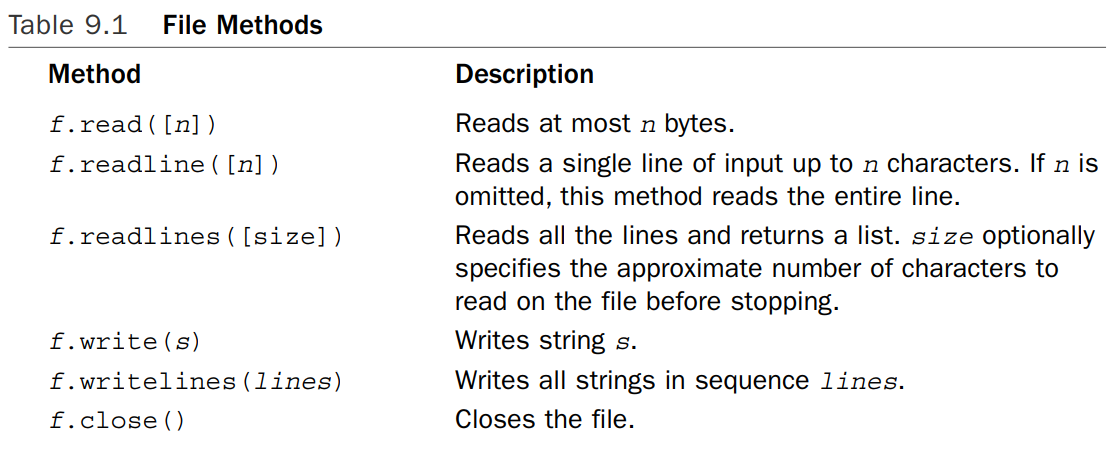

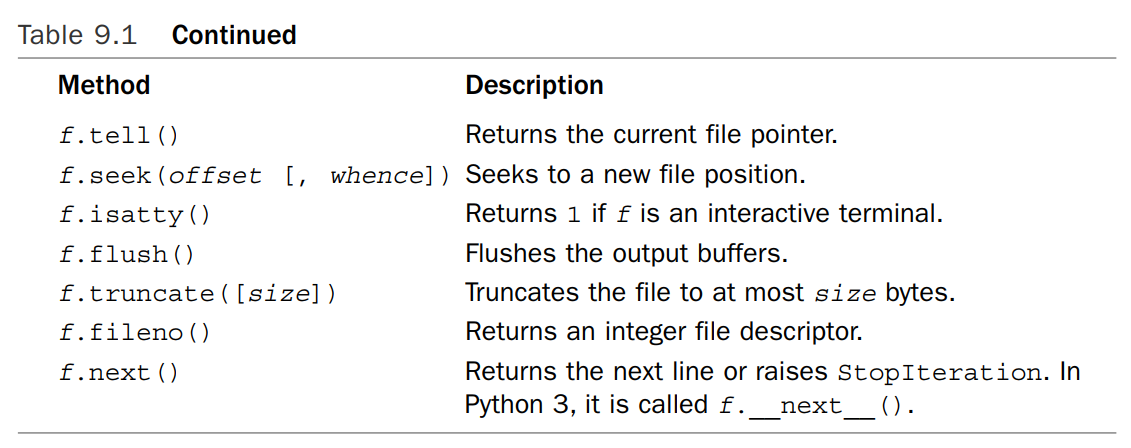

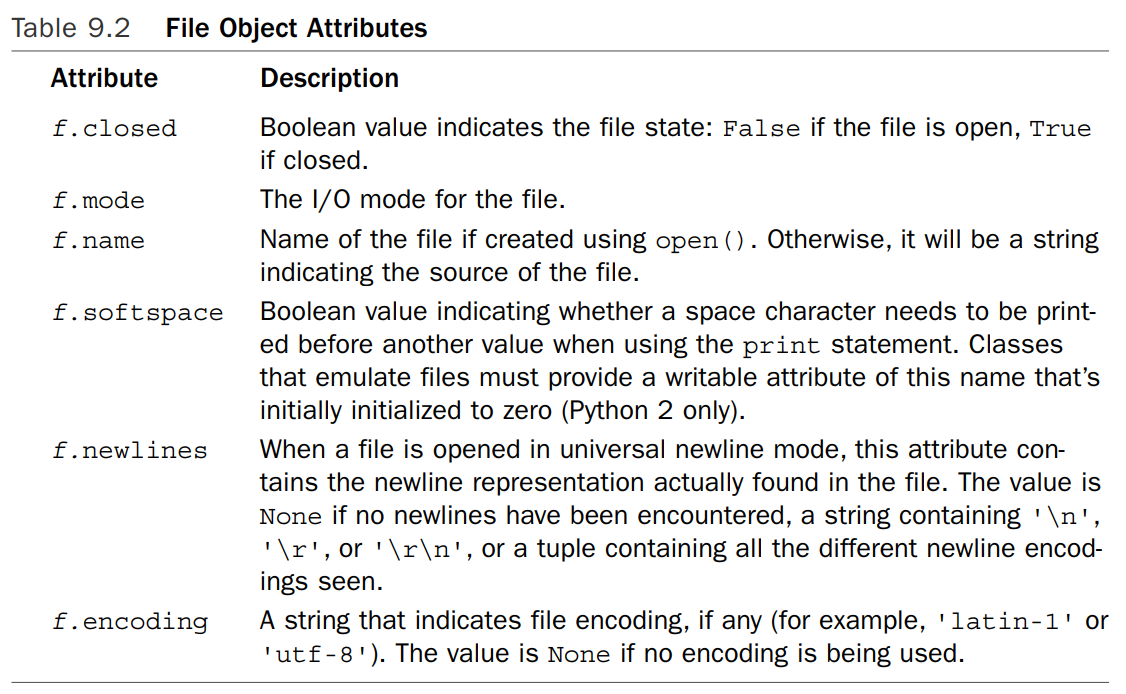

### Standard Input, Output, and Error

- The interpreter provides three standard file objects, known as **standard input**, **standard output**, and **standard error**, which are available in the sys module as `sys.stdin`, `sys.stdout`, and `sys.stderr`, respectively. 
    - `stdin` is a file object corresponding to the stream of input characters supplied to the interpreter. 
    - `stdout` is the file object that receives output produced by print. 
    - `stderr` is a file that receives error messages. 
  
  More often than not, stdin is mapped to the user’s keyboard, whereas stdout and stderr produce text onscreen.
  
- `input()` to allow for interaction between program and user.

- Keyboard interrupts (typically generated by Ctrl+C) result in a `KeyboardInterrupt` exception that can be caught using an exception handler.

- If necessary, the values of `sys.stdout`, `sys.stdin`, and `sys.stderr` can be replaced with other file objects, in which case the `print` statement and `input` functions use the new values. 
    - Should it ever be necessary to restore the original value of `sys.stdout`, it should be saved first.
    - The original values of `sys.stdout`, `sys.stdin`, and `sys.stderr` at interpreter startup are also available in `sys.__stdout__`, `sys.__stdin__`, and `sys.__stderr__`, respectively.

- Note that in some cases `sys.stdin`, `sys.stdout`, and `sys.stderr` may be **altered by the use of an integrated development environment (IDE)**. 

### The `print()` Function

- To **print a series of values separated by spaces**, just supply them all to `print()`.

- To **suppress or change the line ending**, use the `end=ending` keyword argument.

- To **redirect the output to a file**, use the `file=outfile` keyword argument.

- To **change the separator character between items**, use the `sep=sepchr` keyword argument.

### Variable Interpolation in Text Output

- Python provides no direct equivalent of **dollar-variable susstitutions**, but it can be emulated using formatted I/O combined with triple-quoted strings. Not sure how useful this is, but there is an example on Page 164 of [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References).

## References
- [< Python Essential References >](https://www.evernote.com/shard/s191/nl/21353936/3a76bfd7-5b40-de76-dc58-c1805f99d416?title=Python%20Essential%20References), Chapter 9.